In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal, norm
from scipy.interpolate import griddata
from matplotlib import cm
plt.rcParams['font.size'] = '24'

In [3]:
sigma = 1

In [4]:
def sample_cnd(tau):
    z = np.random.normal()
    u = np.random.uniform(0,1)
    normal = norm(0, 1)
    y = normal.ppf(normal.cdf(tau) + u * (1 - normal.cdf(tau)))
    phi_prime = 1#sigma * tau / np.linalg.norm(sigma * tau
    phi = phi_prime * y# + (1 - np.outer(phi_prime, phi_prime)[0,0]) * z
    p = phi * sigma
    return p

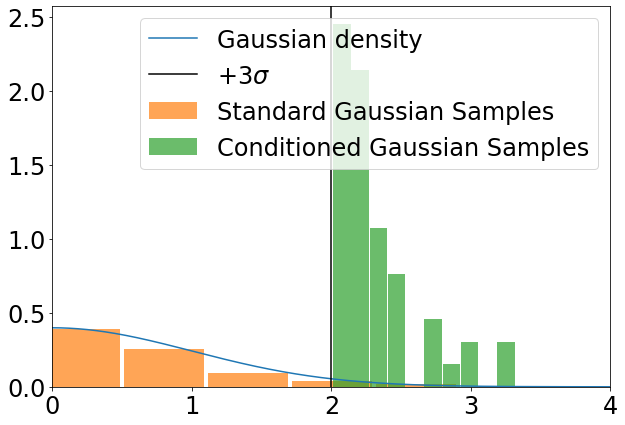

In [5]:
nominals = np.random.normal(0, sigma, size = 200)
cnds = [sample_cnd(2 * sigma) for i in range(50)]
plt.figure(figsize=(10, 7))
xs_norm = np.linspace(0, 4, 1000)
ys_norm = [norm.pdf(x, 0, sigma) for x in xs_norm]
plt.xlim((0,4))
plt.plot(xs_norm, ys_norm, label="Gaussian density")
#plt.axvline(x=-3, label=r'$-3\sigma$', color='k')
plt.axvline(x=2 * sigma, label=r'$+3\sigma$', color='k')
plt.hist(nominals, density=True, label="Standard Gaussian Samples", alpha=0.7, rwidth=0.95)
plt.hist(cnds, density=True, label="Conditioned Gaussian Samples", alpha=0.7, rwidth=0.95)
plt.legend()

In [6]:
def plot_half_space(point, normal):
    d = - point.dot(normal)
    xs = np.linspace(-10, 10, 100)
    ys = (-normal[0] * xs - d * 1) / normal[1]
    plt.fill_between(xs, ys, ys + np.sign(normal[1]) * 1000, alpha = 0.2, color='C7')
    plt.plot(xs, ys, color='C7')
    return d
def sample_cnd_2d(omega, tau = 3):
    z = np.random.multivariate_normal(np.zeros(2), np.eye(2))
    u = np.random.uniform(0,1)
    normal = norm(0, 1)
    y = normal.ppf(normal.cdf(tau) + u * (1 - normal.cdf(tau)))
    phi_prime = omega / np.linalg.norm(omega)
    phi = phi_prime * y + (np.eye(2) - np.outer(phi_prime, phi_prime)).dot(z)
    p = phi
    return p
def sample_mixture(W, ds):
    u = np.random.uniform(0, 1)
    probas = ds / np.sum(ds)
    probas = np.sort(probas)
    pieces = np.cumsum(probas)
    
    picked_comp = 0
    if u < pieces[0]:
        picked_comp = 0
    else:
        for i in range(len(pieces) - 1):
            if (u >= pieces[i]) and (u < pieces[i+1]):
                picked_comp = i + 1
                break
#     if picked_comp == 5:
#         print("Picked: ", picked_comp, " out of ", len(W) - 1)
    return sample_cnd_2d(W[picked_comp], ds[picked_comp])

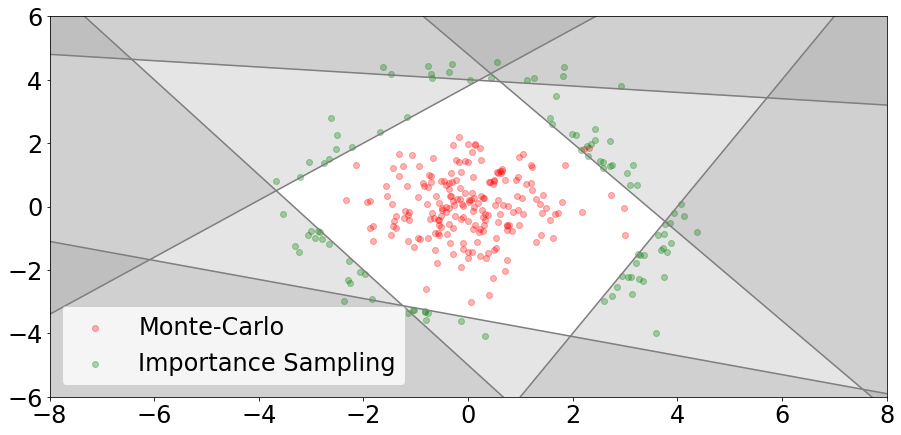

In [7]:
plt.figure(figsize=(15,7))
Points = [np.array([2,2]), np.array([0, 4]), np.array([0, -3.5]), np.array([-2, -2]), np.array([-2, 2]), np.array([3, -2])]
W = [np.array([1.4, 1]), np.array([0.1, 1]), np.array([-0.3, -1]), np.array([-1.5, -1]), np.array([-0.9, 1]), np.array([2, -1])]
ds = []

for i in range(len(W)):
    ###!!!!!!
    ds.append(-plot_half_space(point=Points[i], normal=W[i]) / np.linalg.norm(W[i]))
    ###!!!!!! DIVIDE OVER NORM OF W[i]!!!
normal_2d = np.random.multivariate_normal(np.zeros(2), np.eye(2), 200)
plt.scatter(normal_2d[:,0], normal_2d[:, 1],color='red', label="Monte-Carlo", alpha=0.3)
cnd_2d = np.array([sample_mixture(W, ds) for i in range(100)])
plt.scatter(cnd_2d[:,0], cnd_2d[:, 1],color='green', label="Importance Sampling", alpha=0.3)
plt.ylim(-6, 6)
plt.xlim(-8, 8)
plt.legend()
plt.savefig('conditioned_vs_MC.jpg')
plt.show()

In [2]:
def generate_pts_for_sincos(J = 361, tau = 1.5):
    Omega = [(np.sin(2 * np.pi * i / J), np.cos(2 * np.pi * i / J)) for i in range(0, J)]
    A = []
    for w in Omega:
        w1 = w[0]
        w2 = w[1]
        a21 = tau
        a11 = (w1**2 + w2**2 - a21 * w2) / w1
        a22 = -tau
        a12 = (w1**2 + w2**2 - a22 * w2) / w1
        A.append([(a11, a12), (a21, a22)])
    return np.array(A), Omega
    

In [27]:
A, Omega = generate_pts_for_sincos(J = 9, tau=1.5)

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [28]:
rads = [0.2, 0.3, 0.45, 0.6, 1.0, 1.6, 2.2, 3.0]

In [23]:
A[0][0] = [-1.5, 1.5]
A[0][1] = [1, 1]

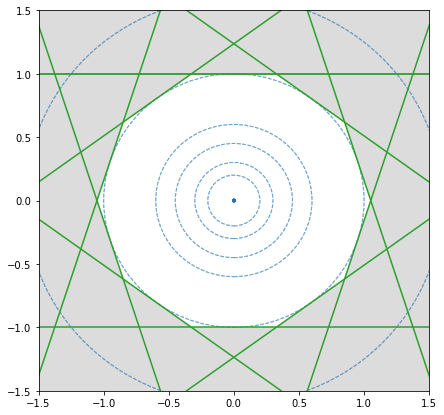

In [25]:
fig = plt.figure(figsize=(7, 7))
for (i, guy) in enumerate(A):
    #first = A[0]
    #second = A[1]
    #if max(guy[0]) < 10:
    if i == 112:
        plt.plot(guy[0], guy[1], color="tab:red", alpha=1.0)
    else:
        plt.plot(guy[0], guy[1], color="tab:green", alpha=1.0)
    if (Omega[i][1] <= 0):
        plt.fill_between(guy[0],guy[1]-10, guy[1], color="gainsboro")
        #plt.plot(guy[0], guy[1] - 10, color="white")
    if (Omega[i][1] > 0):
        plt.fill_between(guy[0], guy[1], guy[1] + 10, color="gainsboro")
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))
    if ((i % 20) == 0):
        plt.plot(guy[0], guy[1], color="tab:green", alpha=0.8)
    ax = fig.gca()
    for rad in rads:
        cir = plt.Circle((0,0), rad, ls='--', color="tab:blue", fill=False, alpha=0.1)
        ax.add_patch(cir)
    zero_pt = plt.Circle((0,0), 0.01, color="tab:blue")
    ax.add_patch(zero_pt)
#background
#ax = plt.axes()
#ax.set_facecolor("gainsboro")

#x = np.linspace(0, 2 * np.pi, 100)
#plt.fill_between(np.sin(x), np.cos(x), facecolor="white", alpha=0.9)
#gaussians

plt.savefig("sincos_green.jpg")
plt.show()

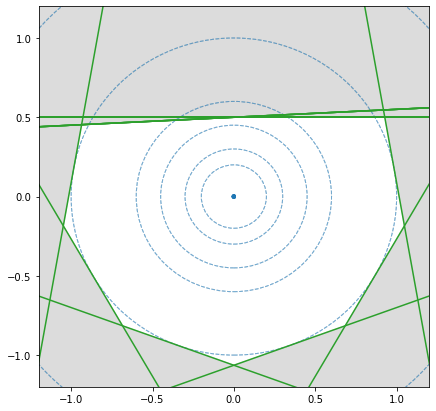

In [32]:
fig = plt.figure(figsize=(7, 7))
for (i, guy) in enumerate(A):
    #first = A[0]
    #second = A[1]
    #if max(guy[0]) < 10:
    
    if ((i != 8) and (i != 1)):
        plt.plot(guy[0], guy[1], color="tab:green", alpha=1.0)
        if (Omega[i][1] <= 0):
            plt.fill_between(guy[0],guy[1]-10, guy[1], color="gainsboro")
            #plt.plot(guy[0], guy[1] - 10, color="white")
        if (Omega[i][1] > 0):
            plt.fill_between(guy[0], guy[1], guy[1] + 10, color="gainsboro")
        plt.xlim((-1.5,1.5))
        plt.ylim((-1.5,1.5))
        if ((i % 20) == 0):
            plt.plot(guy[0], guy[1], color="tab:green", alpha=0.8)
    #adding horizonral
    
    xs_tmp = np.array([-2, 2])
    ys_tmp = np.array([0.5, 0.5])
    
    plt.plot(xs_tmp, ys_tmp, color="tab:green", alpha=0.5)
    if (Omega[i][1] <= 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp+10, color="gainsboro")
        #plt.plot(guy[0], guy[1] - 10, color="white")
    if (Omega[i][1] > 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp + 10, color="gainsboro")
    xs_tmp = np.array([-2, 2])
    ys_tmp = np.array([0.4, 0.6])
    plt.plot(xs_tmp, ys_tmp, color="tab:green", alpha=0.5)
    if (Omega[i][1] <= 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp+10, color="gainsboro")
        #plt.plot(guy[0], guy[1] - 10, color="white")
    if (Omega[i][1] > 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp + 10, color="gainsboro")
    xs_tmp = np.array([-2, 2])
    ys_tmp = np.array([0.6, 0.4])
    plt.plot(xs_tmp, ys_tmp, color="tab:green", alpha=0.5)
    if (Omega[i][1] <= 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp+10, color="gainsboro")
        #plt.plot(guy[0], guy[1] - 10, color="white")
    if (Omega[i][1] > 0):
        plt.fill_between(xs_tmp, ys_tmp, ys_tmp + 10, color="gainsboro")
    plt.xlim((-1.2,1.2))
    plt.ylim((-1.2,1.2))
    
    
    ax = fig.gca()
    for rad in rads:
        cir = plt.Circle((0,0), rad, ls='--', color="tab:blue", fill=False, alpha=0.1)
        ax.add_patch(cir)
    zero_pt = plt.Circle((0,0), 0.01, color="tab:blue")
    ax.add_patch(zero_pt)
#background
#ax = plt.axes()
#ax.set_facecolor("gainsboro")

#x = np.linspace(0, 2 * np.pi, 100)
#plt.fill_between(np.sin(x), np.cos(x), facecolor="white", alpha=0.9)
#gaussians

plt.savefig("sincos_green_shiv.jpg")
plt.show()

In [154]:
A, Omega = generate_pts_for_sincos(720, 1.5)

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [169]:
def plt_shiv(ang0, ang1, ang2):
    fig = plt.figure(figsize=(7, 7))
    for (i, guy) in enumerate(A):
        #first = A[0]
        #second = A[1]
        if (((i == ang0) or (i > ang1 and i < ang2)) and ((i % 5) ==0)):
            plt.plot(guy[0], guy[1], color="tab:green", alpha=1.0)
            if (Omega[i][1] <= 0):
                plt.fill_between(guy[0],guy[1]-10, guy[1], color="gainsboro")
                #plt.plot(guy[0], guy[1] - 10, color="white")
            if (Omega[i][1] > 0):
                plt.fill_between(guy[0], guy[1], guy[1] + 10, color="gainsboro")
        plt.xlim((-1.5,1.5))
        plt.ylim((-1.5,1.5))
        #if ((i % 3) == 0):
        #    plt.plot(guy[0], guy[1], color="tab:green", alpha=1.0)
    #background
    plt.plot([-1.5, 1.5], [1., 1], color="tab:green", alpha=0.8)
    plt.fill_between([-1.5, 1.5], [1, 1],[2., 2], facecolor="gainsboro", alpha=1.0)
    #ax = plt.axes()
    #ax.set_facecolor("gainsboro")

    #gaussians
    ax = fig.gca()
    for rad in rads:
        cir = plt.Circle((0,0), rad, ls='--', color="tab:blue", fill=False, alpha=0.4)
        ax.add_patch(cir)
    zero_pt = plt.Circle((0,0), 0.01, color="tab:blue")
    ax.add_patch(zero_pt)
    
    fig.savefig("shivering_plot.jpg")
    plt.show()

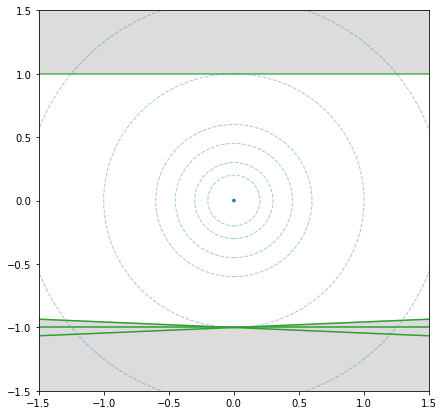

In [170]:
plt_shiv(720, 350, 370)